In [3]:
import os
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from dekef.base_density import *

from IFlogdensity.contam_sm_de import *
from IFlogdensity.influence_function_sm_de import *

from IPython.display import Markdown as md

In [4]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')

true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)
data_waiting = df[df != 108.0]

xlimit = (1., 410.) # (21., 410.)
plot_pts_cnt = 3000 # 2000
newx = np.linspace(xlimit[0], xlimit[1], plot_pts_cnt)

contam_data_list = np.arange(2., 410., 4)[::-1]
contam_weight = 0.01

kernel_type = 'gaussian_poly2'
bw = 5.0
log_pen_param = -10.0
var_name = 'additional observation'

## Sup-norm of Influence Function of ML Log-density Estimates 

In [15]:
# read in the sup-norms of maximum likelihood log-density estimates 
ML_sup = pd.read_csv('data/ML-averaged-IF-supnorms.csv')
ML_sup.rename(columns = {'IFsupnorm': 'IFsupnorm_ML'}, inplace = True)
ML_sup.drop(columns = 'Unnamed: 0', inplace = True)
ML_sup

,bw,loglambda,contam_data,IFsupnorm_ML
0,5.0,-10.0,2.0,21.430573
1,5.0,-10.0,6.0,20.220062
2,5.0,-10.0,10.0,20.516554
3,5.0,-10.0,14.0,23.517424
4,5.0,-10.0,18.0,28.851906
...,...,...,...,...
97,5.0,-10.0,390.0,17.862597
98,5.0,-10.0,394.0,24.120629
99,5.0,-10.0,398.0,22.143041
100,5.0,-10.0,402.0,25.850548


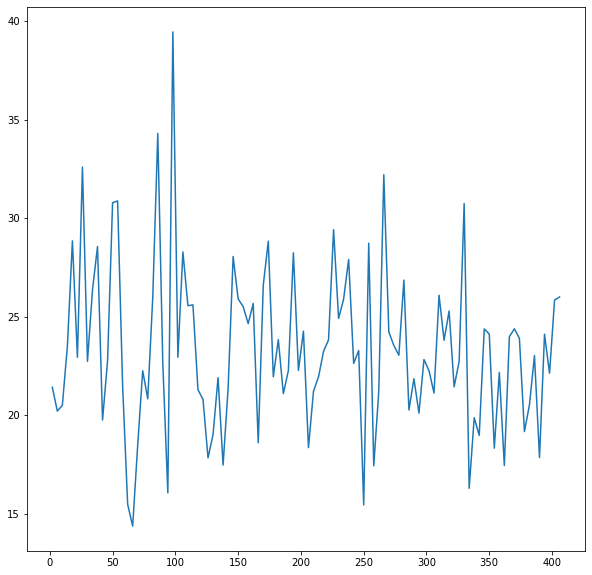

In [16]:
plt.figure(figsize = (10, 10))
plt.plot(ML_sup.contam_data, ML_sup.IFsupnorm_ML, color = 'tab:blue')

## Sup-norm of Influence Function of Score Matching Log-density Estimates 

In [18]:
# extract the supremum norm of the influence function of log-density 
contam_data_list = np.arange(2., 410., 4).reshape(-1, 1)
sup_norm = {}

sup_norm['bw'] = [bw] * len(contam_data_list)
sup_norm['loglambda'] = [log_pen_param] * len(contam_data_list)
sup_norm['contam_data'] = contam_data_list.flatten()
sup_norm['IFsupnorm_SM'] = []

dir_name = (f'data/SM-bw={bw}-' + 
            f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
            f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}')

for contam_data in contam_data_list: 

    sub_df = np.load(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
    sup_norm['IFsupnorm_SM'].append(np.max(np.abs(sub_df)))

SM_sup = pd.DataFrame(sup_norm)
SM_sup

,bw,loglambda,contam_data,IFsupnorm_SM
0,5.0,-10.0,2.0,3281.227796
1,5.0,-10.0,6.0,1314.131202
2,5.0,-10.0,10.0,1034.601199
3,5.0,-10.0,14.0,951.753337
4,5.0,-10.0,18.0,918.316757
...,...,...,...,...
97,5.0,-10.0,390.0,884.298565
98,5.0,-10.0,394.0,884.115473
99,5.0,-10.0,398.0,884.303775
100,5.0,-10.0,402.0,884.338676


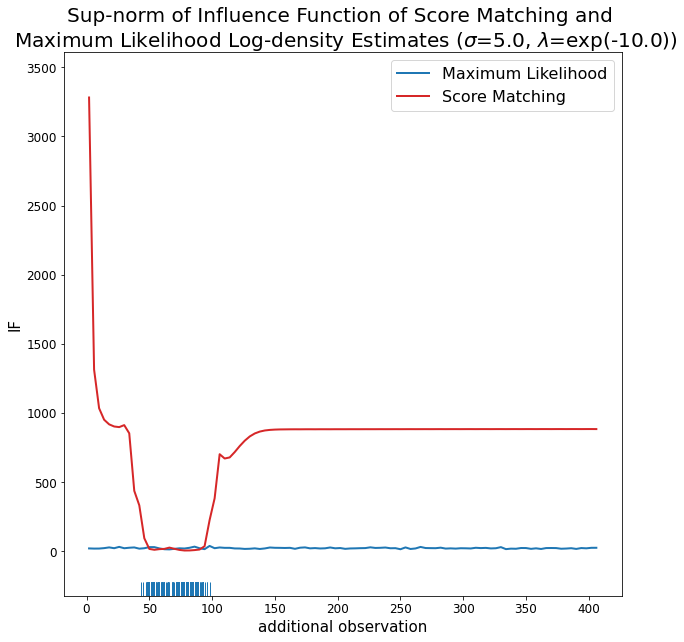

In [38]:
fontsize_label = 15
fontsize_tick = 12
fontsize_info = 16
fontsize_title = 20
fontsize_suptitle = 22
linewidth = 2.0

plt.figure(figsize = (10, 10))
plt.plot(ML_sup.contam_data, ML_sup.IFsupnorm_ML, color = 'tab:blue', label = 'Maximum Likelihood', lw = linewidth)
plt.plot(SM_sup.contam_data, SM_sup.IFsupnorm_SM, color = 'tab:red', label = 'Score Matching', lw = linewidth)
plt.xlabel(var_name, fontsize = fontsize_label)
plt.ylabel('IF', fontsize = fontsize_label)
sns.rugplot(pd.Series(data_waiting.flatten()), color = 'tab:blue')
plt.tick_params('both', labelsize = fontsize_tick)
plt.title('Sup-norm of Influence Function of Score Matching and \n Maximum Likelihood Log-density Estimates ' + r'($\sigma$={bw}, $\lambda$=exp({logpen}))'.format(bw = bw, logpen = log_pen_param), fontsize = fontsize_title)
plt.legend(fontsize = fontsize_info)

plt.savefig('plots/compare-SM-ML-IF-supnorm.pdf')

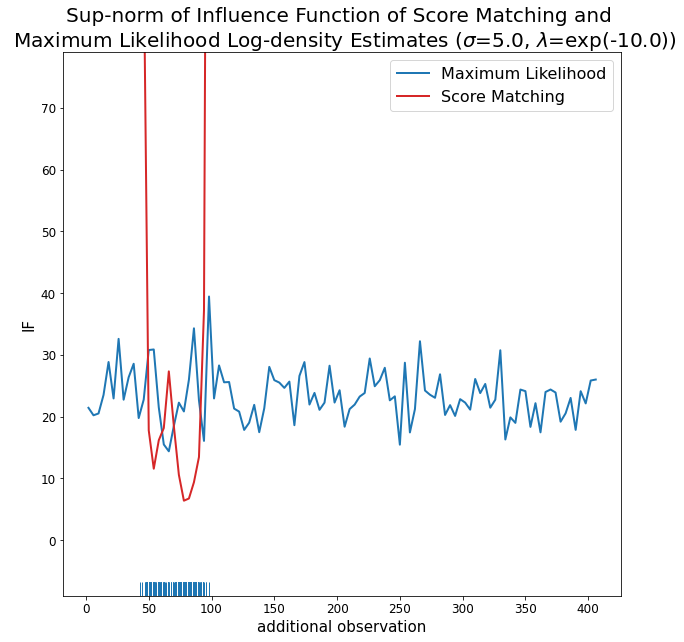

In [39]:
plt.figure(figsize = (10, 10))
plt.plot(ML_sup.contam_data, ML_sup.IFsupnorm_ML, color = 'tab:blue', label = 'Maximum Likelihood', lw = linewidth)
plt.plot(SM_sup.contam_data, SM_sup.IFsupnorm_SM, color = 'tab:red', label = 'Score Matching', lw = linewidth)
sns.rugplot(pd.Series(data_waiting.flatten()), color = 'tab:blue')
plt.ylim(-9., 79.)
plt.xlabel(var_name, fontsize = fontsize_label)
plt.ylabel('IF', fontsize = fontsize_label)
plt.tick_params('both', labelsize = fontsize_tick)
plt.title('Sup-norm of Influence Function of Score Matching and \n Maximum Likelihood Log-density Estimates ' + r'($\sigma$={bw}, $\lambda$=exp({logpen}))'.format(bw = bw, logpen = log_pen_param), fontsize = fontsize_title)
plt.legend(fontsize = fontsize_info)

plt.savefig('plots/compare-SM-ML-IF-supnorm-zoomin.pdf')

In [26]:
os.getcwd()

'/Users/chenxizhou/Dropbox/code_package/IFlogdensity'

In [ ]:

bw_list = [5.]
log_pen_param_list = [-10.]
kernel_type = 'gaussian_poly2'
contam_weight = 1e-2
xlimit = (1., 410.)
plot_pts_cnt = 3000
abstol = 0.015
random_seed_list = [0, 9, 1119]
output_pd1 = pd.DataFrame()

for seed in random_seed_list: 

    for bw in bw_list: 
        for log_pen_param in log_pen_param_list: 

            

In [ ]:
output_pd2.loc[output_pd2.contam_data == 20.0, 'IFsupnorm'] = 30

In [ ]:
from scipy.stats import levene
levene(output_pd1.IFsupnorm, output_pd2.IFsupnorm, center='mean', proportiontocut=0.05)

In [ ]:
np.var(output_pd1.IFsupnorm.to_numpy()), np.var(output_pd2.IFsupnorm.to_numpy())

In [ ]:
import scipy
scipy.stats.ks_2samp(output_pd1.IFsupnorm.to_numpy(), output_pd2.IFsupnorm.to_numpy())

In [ ]:
output_pd_sub = output_pd2
# output_pd_sub = output_pd[(output_pd.bw == bw) & (output_pd.loglambda == loglambda)]
output_pd_sub1 = output_pd_sub[(40. <= output_pd_sub.contam_data) & (output_pd_sub.contam_data <= 100.)]
output_pd_sub2 = output_pd_sub[(40. > output_pd_sub.contam_data) | (output_pd_sub.contam_data > 100.)]
scipy.stats.ks_2samp(output_pd_sub2.IFsupnorm, output_pd_sub1.IFsupnorm)

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (10, 10))
plt.plot(contam_data_list, output_pd1.IFsupnorm, 'r-', label = '0.015')
plt.xlabel('additional observation', fontsize = 15)
plt.ylabel('IF sup norm', fontsize = 15)
plt.legend()
plt.tick_params('both', labelsize = 15)

In [ ]:
df = np.random.randn(100)
df = np.concatenate([df, -df]).reshape(-1, 1)

# bandwidth parameter in the Gaussian kernel function
bw = 1.0

# penalty parameter 
log_pen_param = -8.0

# base density 
base_density = BasedenNormal(df, np.array([[0.]]), 3.)

plot_kwargs = plot_IF_1d_params(x_limit=(-10., 10.), plot_pts_cnt = 2000, figsize = (20, 10))

In [ ]:
contam_data_list = [-7., 7] # np.linspace(90., 500., 10) # np.linspace(1e20, 1e21, 10)
if_norm = []
if_limit_norm = []
for contam_pt in contam_data_list: 
    
    print('-' * 50)
    print(f'Current contaminated data point is {contam_pt}.')
    
    contam_data = np.array([[contam_pt]])
    
    ifun = SMInfluenceFunction(
        data = df, 
        contam_data = contam_data, 
        contam_weight = 1e-8, 
        penalty_param = np.exp(log_pen_param), 
        base_density = base_density, 
        bw = bw)
    
    ifun1 = ifun.plot_IF_logdensity_1d(plot_kwargs, 'waiting')
    ifun2 = ifun.plot_IF_natparam_1d(plot_kwargs, 'waiting')
    ifun3 = ifun.plot_IF_natparam_limit_1d(plot_kwargs, 'waiting')
    

In [ ]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)

# original data with 108.0 removed 
data_waiting = df[df != 108.0]

# bandwidth parameter in the Gaussian kernel function
bw = 5.0

# penalty parameter 
log_pen_param = -8.0

# base density 
base_density = BasedenGamma(np.load('data/geyser.npy').astype(np.float64)[:, 0])

plot_kwargs = plot_IF_1d_params(x_limit=(21., 410.), plot_pts_cnt = 2000, figsize = (20, 10))

In [ ]:
# contaminated data 
contam_data_list = [250.] # np.linspace(90., 500., 10) # np.linspace(1e20, 1e21, 10)
if_norm = []
if_limit_norm = []
for contam_pt in contam_data_list: 
    
    print('-' * 50)
    print(f'Current contaminated data point is {contam_pt}.')
    
    contam_data = np.array([[contam_pt]])
    
    ifun = SMInfluenceFunction(
        data = data_waiting, 
        contam_data = contam_data, 
        contam_weight = 1e-8, 
        penalty_param = np.exp(log_pen_param), 
        base_density = base_density, 
        bw = bw)
    
    ifun1 = ifun.plot_IF_logdensity_1d(plot_kwargs, 'waiting')
    ifun2 = ifun.plot_IF_natparam_1d(plot_kwargs, 'waiting')
    ifun3 = ifun.plot_IF_natparam_limit_1d(plot_kwargs, 'waiting')
    
#     if_norm.append(ifun.eval_IF_natparam_norm())

#     if_limit_norm.append(ifun.eval_IF_natparam_limit_norm_1d())

# plt.plot(contam_data_list, if_norm, 'b-')
# plt.plot(contam_data_list, if_limit_norm, 'r-')

In [ ]:
random_seed_nums = list(range(10))
random_seed_nums